In [ ]:
import tensorflow as tf

In [ ]:
x = tf.Variable(3.0)
y = tf.Variable(2.0)

$$f(x,y)=(x^2 + y^2)$$

$$\nabla f(x,y) = \frac{\partial f}{\partial x} \hat{\imath} +  \frac{\partial f}{\partial y} \hat{\jmath}$$

$$\nabla f(x,y) = 2x\hat{\imath} + 2y\hat{\jmath}$$

$$\nabla f(x=3,y=2) = 2(3)\hat{\imath} + 2(2)\hat{\jmath}$$



In [ ]:
with tf.GradientTape() as tape:
  f = tf.square(x) + tf.square(y) 

  df_dx, df_dy = tape.gradient(f, [x, y])

  print(df_dx)
  print(df_dy)

tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(4.0, shape=(), dtype=float32)


# Simple linear regression example

$$f(x) = W.x + b$$

In [ ]:
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 1000


x = tf.random.normal(shape=[NUM_EXAMPLES])

In [ ]:
noise = tf.random.normal(shape=[NUM_EXAMPLES])
# noise = 0

In [ ]:
y = x * TRUE_W + TRUE_B + noise

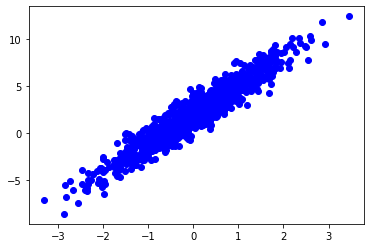

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x, y, c='b')
plt.show()

## Model definition

In [ ]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)

    # initial weights
    self.w = tf.Variable(5.0) # TRUE_W = 3.0
    self.b = tf.Variable(0.0) # TRUE_B = 2.0

  def __call__(self, x):
    return self.w*x + self.b

In [ ]:
model = MyModel()

x | y

In [ ]:
model(3)

<tf.Tensor: shape=(), dtype=float32, numpy=15.0>

In [ ]:
model.w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>

In [ ]:
model.b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

## Define loss function

In [ ]:
def MSE_loss(target_y, predicted_y):
  error = target_y - predicted_y
  squared_error = tf.square(error)
  mse = tf.reduce_mean(squared_error)
  return mse

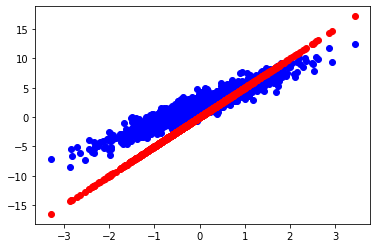

In [ ]:
plt.scatter(x, y, c="b")

pred_y = model(x) # its an untrained model
plt.scatter(x, pred_y, c="r")

plt.show()


In [ ]:
current_loss = MSE_loss(y, model(x))
current_loss

<tf.Tensor: shape=(), dtype=float32, numpy=9.077824>

In [ ]:
current_loss.numpy()

9.077824

## Define training function

In [ ]:
def train(model, x, y, learning_rate):

  with tf.GradientTape() as tape:
    y_hat = model(x)
    current_loss = MSE_loss(y, y_hat)

  dc_dw, dc_db = tape.gradient(current_loss, [model.w, model.b])

  model.w.assign_sub(learning_rate * dc_dw) # w = w - n * grad => w -= n*grad_w
  model.b.assign_sub(learning_rate * dc_db) # b = b - n * grad => b -= n*grad_b

In [ ]:
model = MyModel()

Ws, bs = list(), list()

epochs = 20

learning_rate = 0.1

w = model.w.numpy()
b = model.b.numpy()

init_loss = MSE_loss(y, model(x)).numpy()

print(f"initial W: {w}, initial_bias: {b}, initial loss: {init_loss}")

initial W: 5.0, initial_bias: 0.0, initial loss: 9.077823638916016


In [ ]:
for epoch in range(epochs):
  train(model, x, y, learning_rate)

  Ws.append(model.w.numpy())
  bs.append(model.b.numpy())

  current_loss = MSE_loss(y, model(x))

  print(f"For epoch: {epoch}, W: {Ws[-1]}, initial_bias: {bs[-1]}, current loss: {current_loss}")

For epoch: 0, W: 4.613045692443848, initial_bias: 0.41464763879776, current loss: 6.180232048034668
For epoch: 1, W: 4.301718711853027, initial_bias: 0.7459718585014343, current loss: 4.318243026733398
For epoch: 2, W: 4.051236152648926, initial_bias: 1.0107142925262451, current loss: 3.121676206588745
For epoch: 3, W: 3.8497049808502197, initial_bias: 1.2222533226013184, current loss: 2.3526909351348877
For epoch: 4, W: 3.6875572204589844, initial_bias: 1.3912794589996338, current loss: 1.8584719896316528
For epoch: 5, W: 3.5570952892303467, initial_bias: 1.5263352394104004, current loss: 1.5408273935317993
For epoch: 6, W: 3.4521262645721436, initial_bias: 1.634247064590454, current loss: 1.336660385131836
For epoch: 7, W: 3.3676681518554688, initial_bias: 1.7204697132110596, current loss: 1.2054253816604614
For epoch: 8, W: 3.2997124195098877, initial_bias: 1.789361834526062, current loss: 1.121065616607666
For epoch: 9, W: 3.2450342178344727, initial_bias: 1.8444063663482666, curre

In [ ]:
[5]*20

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

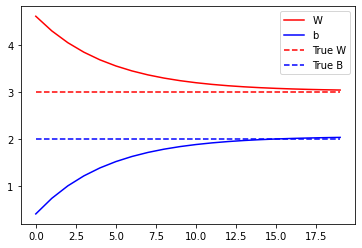

In [ ]:
plt.plot(range(epochs), Ws, "r", range(epochs), bs, "b") # Training line

plt.plot([TRUE_W]*epochs, "r--", [TRUE_B]*epochs, "b--") # Target line

plt.legend(["W", "b", "True W", "True B"])

plt.show()

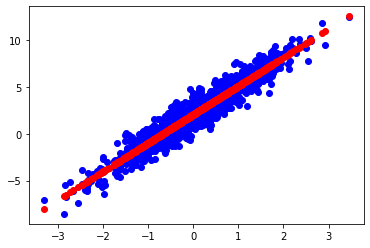

In [ ]:
plt.scatter(x, y, c="b")

pred_y = model(x) # after training
plt.scatter(x, pred_y, c="r")

plt.show()


# LARGE LEARNING RATE :linear regression example

$$f(x) = W.x + b$$

In [ ]:
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 1000


x = tf.random.normal(shape=[NUM_EXAMPLES])

In [ ]:
noise = tf.random.normal(shape=[NUM_EXAMPLES])
# noise = 0

In [ ]:
y = x * TRUE_W + TRUE_B + noise

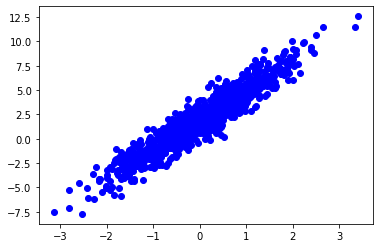

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x, y, c='b')
plt.show()

## Model definition

In [ ]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)

    # initial weights
    self.w = tf.Variable(5.0) # TRUE_W = 3.0
    self.b = tf.Variable(0.0) # TRUE_B = 2.0

  def __call__(self, x):
    return self.w*x + self.b

In [ ]:
model = MyModel()

x | y

In [ ]:
model(3)

<tf.Tensor: shape=(), dtype=float32, numpy=15.0>

In [ ]:
model.w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>

In [ ]:
model.b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

## Define loss function

In [ ]:
def MSE_loss(target_y, predicted_y):
  error = target_y - predicted_y
  squared_error = tf.square(error)
  mse = tf.reduce_mean(squared_error)
  return mse

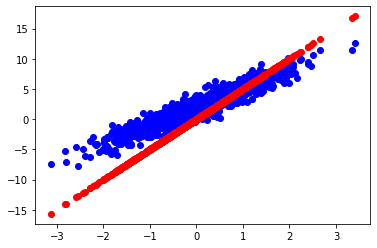

In [ ]:
plt.scatter(x, y, c="b")

pred_y = model(x) # its an untrained model
plt.scatter(x, pred_y, c="r")

plt.show()


In [ ]:
current_loss = MSE_loss(y, model(x))
current_loss

<tf.Tensor: shape=(), dtype=float32, numpy=8.6117325>

In [ ]:
current_loss.numpy()

8.6117325

## Define training function

In [ ]:
def train(model, x, y, learning_rate):

  with tf.GradientTape() as tape:
    y_hat = model(x)
    current_loss = MSE_loss(y, y_hat)

  dc_dw, dc_db = tape.gradient(current_loss, [model.w, model.b])

  model.w.assign_sub(learning_rate * dc_dw) # w = w - n * grad => w -= n*grad_w
  model.b.assign_sub(learning_rate * dc_db) # b = b - n * grad => b -= n*grad_b

In [ ]:
model = MyModel()

Ws, bs = list(), list()

epochs = 20

learning_rate = 0.9 # LARGE LEARNING RATE

w = model.w.numpy()
b = model.b.numpy()

init_loss = MSE_loss(y, model(x)).numpy()

print(f"initial W: {w}, initial_bias: {b}, initial loss: {init_loss}")

initial W: 5.0, initial_bias: 0.0, initial loss: 8.611732482910156


In [ ]:
for epoch in range(epochs):
  train(model, x, y, learning_rate)

  Ws.append(model.w.numpy())
  bs.append(model.b.numpy())

  current_loss = MSE_loss(y, model(x))

  print(f"For epoch: {epoch}, W: {Ws[-1]}, initial_bias: {bs[-1]}, current loss: {current_loss}")

For epoch: 0, W: 1.6004328727722168, initial_bias: 3.5207250118255615, current loss: 5.350274562835693
For epoch: 1, W: 4.036056995391846, initial_bias: 0.7366766929626465, current loss: 3.5151309967041016
For epoch: 2, W: 2.2935545444488525, initial_bias: 2.940607786178589, current loss: 2.4730117321014404
For epoch: 3, W: 3.538151264190674, initial_bias: 1.1941378116607666, current loss: 1.875509262084961
For epoch: 4, W: 2.65083646774292, initial_bias: 2.5794036388397217, current loss: 1.5295315980911255
For epoch: 5, W: 3.2820918560028076, initial_bias: 1.479682207107544, current loss: 1.3271958827972412
For epoch: 6, W: 2.8340959548950195, initial_bias: 2.3534185886383057, current loss: 1.2076994180679321
For epoch: 7, W: 3.15114164352417, initial_bias: 1.6587164402008057, current loss: 1.1364531517028809
For epoch: 8, W: 2.927499771118164, initial_bias: 2.211444139480591, current loss: 1.0935900211334229
For epoch: 9, W: 3.084655284881592, initial_bias: 1.7714022397994995, curren

In [ ]:
[5]*20

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

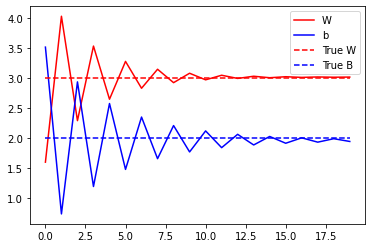

In [ ]:
plt.plot(range(epochs), Ws, "r", range(epochs), bs, "b") # Training line

plt.plot([TRUE_W]*epochs, "r--", [TRUE_B]*epochs, "b--") # Target line

plt.legend(["W", "b", "True W", "True B"])

plt.show()

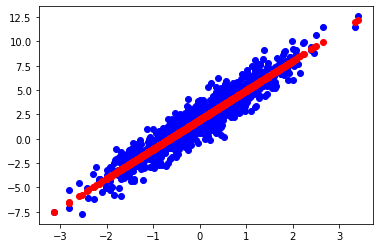

In [ ]:
plt.scatter(x, y, c="b")

pred_y = model(x) # after training
plt.scatter(x, pred_y, c="r")

plt.show()


# LOW LEARNING RATE: linear regression example

$$f(x) = W.x + b$$

In [ ]:
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 1000


x = tf.random.normal(shape=[NUM_EXAMPLES])

In [ ]:
noise = tf.random.normal(shape=[NUM_EXAMPLES])
# noise = 0

In [ ]:
y = x * TRUE_W + TRUE_B + noise

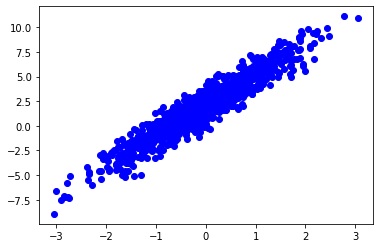

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x, y, c='b')
plt.show()

## Model definition

In [ ]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)

    # initial weights
    self.w = tf.Variable(5.0) # TRUE_W = 3.0
    self.b = tf.Variable(0.0) # TRUE_B = 2.0

  def __call__(self, x):
    return self.w*x + self.b

In [ ]:
model = MyModel()

x | y

In [ ]:
model(3)

<tf.Tensor: shape=(), dtype=float32, numpy=15.0>

In [ ]:
model.w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>

In [ ]:
model.b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

## Define loss function

In [ ]:
def MSE_loss(target_y, predicted_y):
  error = target_y - predicted_y
  squared_error = tf.square(error)
  mse = tf.reduce_mean(squared_error)
  return mse

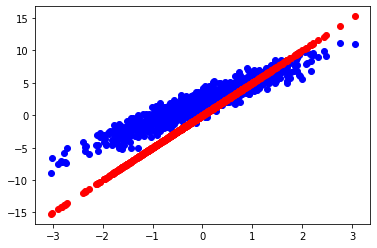

In [ ]:
plt.scatter(x, y, c="b")

pred_y = model(x) # its an untrained model
plt.scatter(x, pred_y, c="r")

plt.show()


In [ ]:
current_loss = MSE_loss(y, model(x))
current_loss

<tf.Tensor: shape=(), dtype=float32, numpy=9.09107>

In [ ]:
current_loss.numpy()

9.09107

## Define training function

In [ ]:
def train(model, x, y, learning_rate):

  with tf.GradientTape() as tape:
    y_hat = model(x)
    current_loss = MSE_loss(y, y_hat)

  dc_dw, dc_db = tape.gradient(current_loss, [model.w, model.b])

  model.w.assign_sub(learning_rate * dc_dw) # w = w - n * grad => w -= n*grad_w
  model.b.assign_sub(learning_rate * dc_db) # b = b - n * grad => b -= n*grad_b

In [ ]:
model = MyModel()

Ws, bs = list(), list()

epochs = 20

learning_rate = 0.001 # LOW LEARING RATE

w = model.w.numpy()
b = model.b.numpy()

init_loss = MSE_loss(y, model(x)).numpy()

print(f"initial W: {w}, initial_bias: {b}, initial loss: {init_loss}")

initial W: 5.0, initial_bias: 0.0, initial loss: 9.091070175170898


In [ ]:
for epoch in range(epochs):
  train(model, x, y, learning_rate)

  Ws.append(model.w.numpy())
  bs.append(model.b.numpy())

  current_loss = MSE_loss(y, model(x))

  print(f"For epoch: {epoch}, W: {Ws[-1]}, initial_bias: {bs[-1]}, current loss: {current_loss}")

For epoch: 0, W: 4.996077537536621, initial_bias: 0.0043081738986074924, current loss: 9.057159423828125
For epoch: 1, W: 4.992163181304932, initial_bias: 0.008607269264757633, current loss: 9.023388862609863
For epoch: 2, W: 4.988256454467773, initial_bias: 0.012897305190563202, current loss: 8.989757537841797
For epoch: 3, W: 4.984357833862305, initial_bias: 0.017178300768136978, current loss: 8.956265449523926
For epoch: 4, W: 4.980467319488525, initial_bias: 0.02145027369260788, current loss: 8.922914505004883
For epoch: 5, W: 4.976584434509277, initial_bias: 0.025713244453072548, current loss: 8.88969898223877
For epoch: 6, W: 4.972709655761719, initial_bias: 0.029967231675982475, current loss: 8.856621742248535
For epoch: 7, W: 4.968842506408691, initial_bias: 0.034212253987789154, current loss: 8.823683738708496
For epoch: 8, W: 4.9649834632873535, initial_bias: 0.03844833001494408, current loss: 8.79088020324707
For epoch: 9, W: 4.961132049560547, initial_bias: 0.04267548024654

In [ ]:
[5]*20

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

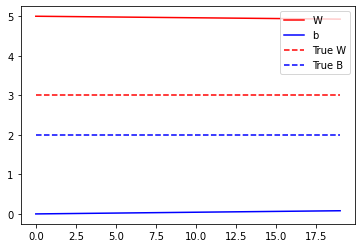

In [ ]:
plt.plot(range(epochs), Ws, "r", range(epochs), bs, "b") # Training line

plt.plot([TRUE_W]*epochs, "r--", [TRUE_B]*epochs, "b--") # Target line

plt.legend(["W", "b", "True W", "True B"])

plt.show()

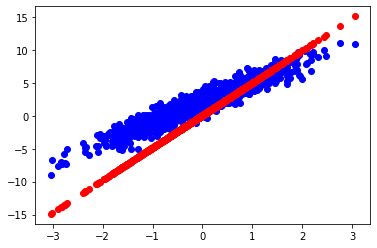

In [ ]:
plt.scatter(x, y, c="b")

pred_y = model(x) # after training
plt.scatter(x, pred_y, c="r")

plt.show()


z = +x+yj

z = +x-yj

z = -x+yj

z = -x-yj

z = yj

z = x


A + B

A - B

A * B

|A|